# K-Means Clustering

Imports:

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from utils import gen_2D_gaussians, mymix
from scipy.spatial.distance import cdist
np.random.seed(123)

## Kmeans com ScikitLearn

### Gerando os dados sintéticos

Text(0.5, 1.0, 'Dados Originais')

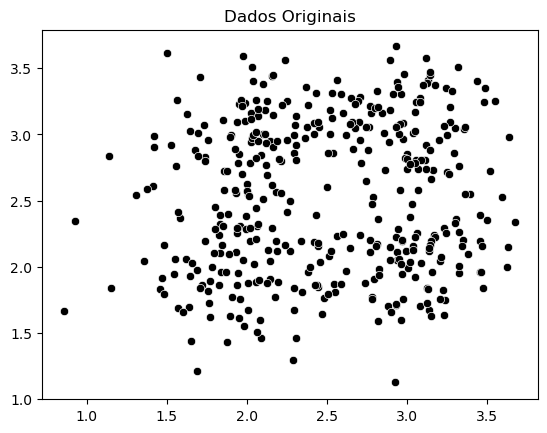

In [ ]:
# Descartamos as labels Y pois KMeans não é classificador
X1, _ = gen_2D_gaussians(s1=0.3, s2=0.3, nc=100, c1=np.array([2,2]), c2=np.array([3,3]))
X2, _ = gen_2D_gaussians(s1=0.3, s2=0.3, nc=100, c1=np.array([3,2]), c2=np.array([2,3]))

g1 = X1[:100]
g2 = X1[101:]
g3 = X2[:100]
g4 = X2[101:]

xall = np.vstack((g1, g2, g3, g4))

plt.scatter(xall[:, 0], xall[:, 1], c='black')
plt.title('Dados Originais')

[[1.94830818 1.97478111]
 [2.01323613 2.97084631]
 [2.98935927 3.0833002 ]
 [3.05369168 2.0540022 ]]


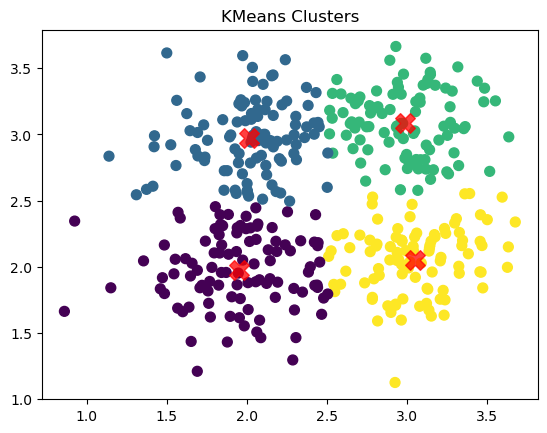

In [22]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(xall)
plt.scatter(xall[:, 0], xall[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('KMeans Clusters')
print(kmeans.cluster_centers_)

<Axes: >

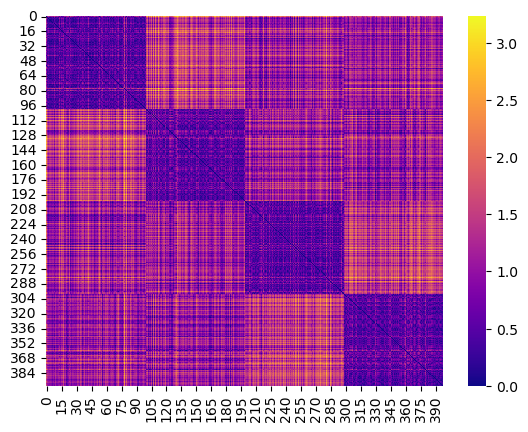

In [ ]:
xall_ordered = xall[np.argsort(kmeans.labels_)]
distance_matrix = cdist(xall, xall, metric='euclidean')
sns.heatmap(distance_matrix, cmap='plasma')

### Separando os clusters

In [6]:
cluster_list = []
for i in range(4):
    cluster_list.append(xall_ordered[kmeans.labels_ == i])

seqi = np.linspace(0, 6, 100)
seqj = np.linspace(0, 6, 100)
M1 = np.zeros((len(seqi), len(seqj)))
for i in range(len(seqi)):
    for j in range(len(seqi)):
        xt = np.array([i, j])
        M1[i][j] = mymix(xt, cluster_list)